# 평점예측

## 0. Library Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Load Data and Preprocessing

In [2]:
# Data Load
df=pd.read_excel("netflix_titles_v0.5_감독&배우_8807.xls")

In [3]:
#컬럼, 데이터 개수 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   rating        3413 non-null   object
 4   director      6173 non-null   object
 5   cast          7896 non-null   object
 6   num_actor     8807 non-null   int64 
 7   country       7976 non-null   object
 8   date_added    8797 non-null   object
 9   release_year  8807 non-null   int64 
 10  rating.1      8803 non-null   object
 11  duration      8804 non-null   object
 12  listed_in     8807 non-null   object
 13  description   8807 non-null   object
dtypes: int64(2), object(12)
memory usage: 963.4+ KB


In [4]:
#테이블 요약 보기
df.head()

,show_id,type,title,rating,director,cast,num_actor,country,date_added,release_year,rating.1,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,64/100,Kirsten Johnson,NaN,0,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,NaN,Ama Qamata,17,South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,Julien Leclercq,Sami Bouajila,9,NaN,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,0,NaN,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,NaN,Mayur More,8,India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# 중복없어야함 중복있는 title 도 일자가 들어가 있음 제거
df[df.duplicated("title")]

,show_id,type,title,rating,director,cast,num_actor,country,date_added,release_year,rating.1,duration,listed_in,description
5964,s5965,TV Show,2021-02-09 00:00:00,NaN,NaN,Shahd El Yaseen,10,NaN,2019-03-20 00:00:00,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
5965,s5966,Movie,2021-07-22 00:00:00,83/100,Paul Greengrass,Anders Danielsen Lie,7,"Norway, Iceland, United States",2018-10-10 00:00:00,2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."
5966,s5967,Movie,2021-08-15 00:00:00,45/100,Swapnaneel Jayakar,Rahul Pethe,8,India,2019-03-29 00:00:00,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."


In [6]:
#영화 타이틀 중복 제거
df=df.drop_duplicates("title") 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   rating        3411 non-null   object
 4   director      6171 non-null   object
 5   cast          7893 non-null   object
 6   num_actor     8804 non-null   int64 
 7   country       7974 non-null   object
 8   date_added    8794 non-null   object
 9   release_year  8804 non-null   int64 
 10  rating.1      8800 non-null   object
 11  duration      8801 non-null   object
 12  listed_in     8804 non-null   object
 13  description   8804 non-null   object
dtypes: int64(2), object(12)
memory usage: 1.0+ MB


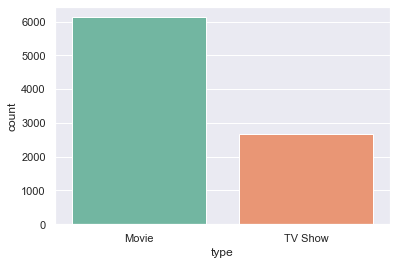

In [7]:
#Movie, Tv Show 개수 시각화
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")

In [8]:
#Movie, Tv Show 개수 확인
df["type"].value_counts()

Movie      6129
TV Show    2675
Name: type, dtype: int64

In [9]:
#Movie예측 이므로 Movie만 발라냄
df=df[df["type"]=="Movie"]
df.head()

,show_id,type,title,rating,director,cast,num_actor,country,date_added,release_year,rating.1,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,64/100,Kirsten Johnson,NaN,0,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,NaN,Robert Cullen,Vanessa Hudgens,10,NaN,2021-09-24 00:00:00,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,NaN,Haile Gerima,Kofi Ghanaba,8,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24 00:00:00,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,NaN,Theodore Melfi,Melissa McCarthy,11,United States,2021-09-24 00:00:00,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,NaN,Christian Schwochow,Luna Wedler,11,"Germany, Czech Republic",2021-09-23 00:00:00,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [10]:
#분석 대상 제외 컬럼 삭제
df=df.drop(["show_id","description","type","release_year","date_added"],axis=1)
df.head()

,title,rating,director,cast,num_actor,country,rating.1,duration,listed_in
0,Dick Johnson Is Dead,64/100,Kirsten Johnson,NaN,0,United States,PG-13,90 min,Documentaries
6,My Little Pony: A New Generation,NaN,Robert Cullen,Vanessa Hudgens,10,NaN,PG,91 min,Children & Family Movies
7,Sankofa,NaN,Haile Gerima,Kofi Ghanaba,8,"United States, Ghana, Burkina Faso, United Kin...",TV-MA,125 min,"Dramas, Independent Movies, International Movies"
9,The Starling,NaN,Theodore Melfi,Melissa McCarthy,11,United States,PG-13,104 min,"Comedies, Dramas"
12,Je Suis Karl,NaN,Christian Schwochow,Luna Wedler,11,"Germany, Czech Republic",TV-MA,127 min,"Dramas, International Movies"


In [11]:
#인덱스설정, rating/duratino 컬럼 수치형 변환 
df=df.set_index("title")
# 상영시간컬럼(duration) 전처리
df.duration = pd.to_numeric(df.duration.str.replace('min', '')) 
# 평점 전처리 (100점 scale)
df.rating = (pd.to_numeric(df.rating.str.replace('/', ''))-100)/1000
df.head()

,rating,director,cast,num_actor,country,rating.1,duration,listed_in
title,,,,,,,,
Dick Johnson Is Dead,64.0,Kirsten Johnson,NaN,0,United States,PG-13,90.0,Documentaries
My Little Pony: A New Generation,NaN,Robert Cullen,Vanessa Hudgens,10,NaN,PG,91.0,Children & Family Movies
Sankofa,NaN,Haile Gerima,Kofi Ghanaba,8,"United States, Ghana, Burkina Faso, United Kin...",TV-MA,125.0,"Dramas, Independent Movies, International Movies"
The Starling,NaN,Theodore Melfi,Melissa McCarthy,11,United States,PG-13,104.0,"Comedies, Dramas"
Je Suis Karl,NaN,Christian Schwochow,Luna Wedler,11,"Germany, Czech Republic",TV-MA,127.0,"Dramas, International Movies"


## 2. 학습전략

1) rating이 Null이 아닌 데이터로 모델을 학습한다 \
2) 학습한 모델로 rating이 Null 인 데이터를 prediction 하여 값을 대체한다 \
3) 1),2) 데이터를 통합 후 다시 모델을 학습한다.

In [12]:
from sklearn.ensemble import VotingClassifier, VotingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor

### 0) null/notnull 데이터 나누기

In [13]:
df_isnull=df[df.rating.isnull()]
df_notnull=df[df.rating.notnull()]

In [14]:
df_notnull.shape, df_isnull.shape

((3396, 8), (2733, 8))

### 변수 목록
- show_id: Unique ID for every Movie / Tv Show
- type: Identifier - A Movie or TV Show
- title: Title of the Movie / Tv Show
- rating: Rotten Tomatoes %
- director: Director of the Movie
- cast: Actors involved in the movie / show
- num_actor: 
- country: Country where the movie / show was produced
- date_added: Date it was added on Netflix
- release_year: Actual Release year of the move / show
- rating.1: TV Rating of the movie / show
- duration: Total Duration - in minutes or number of seasons
- listed_in: Genere
- description: The summary description

### 1) not null 데이터로 모델 학습

In [15]:
# 전처리 : director, cast, country의 결측값 처리
df_notnull.isnull().sum()  

rating         0
director      99
cast         239
num_actor      0
country      182
rating.1       0
duration       0
listed_in      0
dtype: int64

In [16]:
# before
df_notnull.shape

(3396, 8)

In [17]:
df_notnull=df_notnull.dropna()

In [18]:
# after
df_notnull.shape

(2952, 8)

In [19]:
# 독립변수(X) 종속변수(y) 나누기
X=df_notnull.drop(["rating"],axis=1)
y=df_notnull.rating

In [20]:
# before
X.head()

,director,cast,num_actor,country,rating.1,duration,listed_in
title,,,,,,,
Dark Skies,Scott Stewart,Keri Russell,10,United States,PG-13,97.0,"Horror Movies, Sci-Fi & Fantasy"
InuYasha the Movie 2: The Castle Beyond the Looking Glass,Toshiya Shinohara,Kappei Yamaguchi,10,Japan,TV-14,99.0,"Action & Adventure, Anime Features, Internatio..."
InuYasha the Movie 3: Swords of an Honorable Ruler,Toshiya Shinohara,Kappei Yamaguchi,8,Japan,TV-14,99.0,"Action & Adventure, Anime Features, Internatio..."
InuYasha the Movie 4: Fire on the Mystic Island,Toshiya Shinohara,Kappei Yamaguchi,10,Japan,TV-PG,88.0,"Action & Adventure, Anime Features, Internatio..."
InuYasha the Movie: Affections Touching Across Time,Toshiya Shinohara,Kappei Yamaguchi,10,Japan,TV-PG,100.0,"Action & Adventure, Anime Features, Internatio..."


In [21]:
# label encoding for training model
le=LabelEncoder()
lb=["director","cast","country","rating.1","listed_in"]
X[lb]=X[lb].apply(le.fit_transform)

In [22]:
# after
X[lb].head()

,director,cast,country,rating.1,listed_in
title,,,,,
Dark Skies,1918,1102,325,4,190
InuYasha the Movie 2: The Castle Beyond the Looking Glass,2160,1051,163,6,3
InuYasha the Movie 3: Swords of an Honorable Ruler,2160,1051,163,6,3
InuYasha the Movie 4: Fire on the Mystic Island,2160,1051,163,9,3
InuYasha the Movie: Affections Touching Across Time,2160,1051,163,9,3


In [23]:
# split not null data by train and test
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=10, test_size = 0.2)
print('X_train : {0}, X_test : {1}, y_train : {2}, y_test : {3}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (2361, 7), X_test : (591, 7), y_train : (2361,), y_test : (591,)


In [24]:
# model fitting
rf_reg=RandomForestRegressor(random_state=10,max_features="auto", n_estimators=900)
xgb_reg=XGBRegressor(random_state=10,max_depth= 3, n_estimators=100)

er = VotingRegressor([('rf', rf_reg), ('xgb', xgb_reg)])
er.fit(X_train,y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(n_estimators=900,
                                                   random_state=10)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=3,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,


In [25]:
# 영화별 점수차이
pred=y_test.copy()
pred=pred.to_frame()
pred["pred_rating"]=er.predict(X_test)
pred["error"]=abs(pred["pred_rating"]-pred["rating"]) # AE
pred.to_csv('./scoreboard.csv', encoding = 'utf-8')

In [26]:
# r2
print(round(er.score(X_test,y_test),2))

0.42


In [27]:
# RMSE : 평균적으로 예측값과 실제값 사이 10점 정도 차이가 남
np.sqrt(((y_test - er.predict(X_test))**2).mean())

9.940723174927095

### 2. rating컬럼 결측치 예측값 포함
- GridSearch, VotingRegressor 이용(랜덤포레스트, XGBoost 모델 이용)
- 컬럼명: "director","cast","num_actor","country","rating.1","listed_in","duration"

In [28]:
#df_isnull=df[df.rating.isnull()]
# rating 컬럼 drop, 
df_isnull=df_isnull.drop(["rating"],axis=1)
# na row 제거
df_isnull=df_isnull.dropna()

In [29]:
# label encoding
X = df_isnull.copy()
X[lb]=X[lb].apply(le.fit_transform)
# predict rating of the null dataset
pred_isnull=er.predict(X)

In [30]:
df_isnull["rating"]=pred_isnull
df_isnull

,director,cast,num_actor,country,rating.1,duration,listed_in,rating
title,,,,,,,,
Sankofa,Haile Gerima,Kofi Ghanaba,8,"United States, Ghana, Burkina Faso, United Kin...",TV-MA,125.0,"Dramas, Independent Movies, International Movies",61.967210
The Starling,Theodore Melfi,Melissa McCarthy,11,United States,PG-13,104.0,"Comedies, Dramas",65.378189
Je Suis Karl,Christian Schwochow,Luna Wedler,11,"Germany, Czech Republic",TV-MA,127.0,"Dramas, International Movies",59.234776
Jeans,S. Shankar,Prashanth,4,India,TV-14,166.0,"Comedies, International Movies, Romantic Movies",49.913569
Grown Ups,Dennis Dugan,Adam Sandler,11,United States,PG-13,103.0,Comedies,64.020823
...,...,...,...,...,...,...,...,...
Zed Plus,Chandra Prakash Dwivedi,Adil Hussain,10,India,TV-MA,131.0,"Comedies, Dramas, International Movies",56.464623
Zenda,Avadhoot Gupte,Santosh Juvekar,8,India,TV-14,120.0,"Dramas, International Movies",56.082309
Zinzana,Majid Al Ansari,Ali Suliman,6,"United Arab Emirates, Jordan",TV-MA,96.0,"Dramas, International Movies, Thrillers",52.591573


In [31]:
# 데이터셋 통합(notnull + null(pred완료) )
new_df = pd.concat([df_isnull,df_notnull])
new_df.head()

,director,cast,num_actor,country,rating.1,duration,listed_in,rating
title,,,,,,,,
Sankofa,Haile Gerima,Kofi Ghanaba,8,"United States, Ghana, Burkina Faso, United Kin...",TV-MA,125.0,"Dramas, Independent Movies, International Movies",61.967210
The Starling,Theodore Melfi,Melissa McCarthy,11,United States,PG-13,104.0,"Comedies, Dramas",65.378189
Je Suis Karl,Christian Schwochow,Luna Wedler,11,"Germany, Czech Republic",TV-MA,127.0,"Dramas, International Movies",59.234776
Jeans,S. Shankar,Prashanth,4,India,TV-14,166.0,"Comedies, International Movies, Romantic Movies",49.913569
Grown Ups,Dennis Dugan,Adam Sandler,11,United States,PG-13,103.0,Comedies,64.020823


### 3) new_df로 모델 train

In [33]:
X=new_df.drop(["rating"],axis=1)
y=new_df.rating

X[lb]=X[lb].apply(le.fit_transform)

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=10, test_size = 0.2)
print('X_train : {0}, X_test : {1}, y_train : {2}, y_test : {3}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

rf_reg=RandomForestRegressor(random_state=10,max_features="auto", n_estimators=900)
xgb_reg=XGBRegressor(random_state=10,max_depth= 3, n_estimators=100)

er = VotingRegressor([('rf', rf_reg), ('xgb', xgb_reg)])
er.fit(X_train,y_train)

X_train : (4134, 7), X_test : (1034, 7), y_train : (4134,), y_test : (1034,)


VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(n_estimators=900,
                                                   random_state=10)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=3,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,


In [34]:
# 영화별 점수차이
pred=y_test.copy()
pred=pred.to_frame()
pred["pred_rating"]=er.predict(X_test)
pred["error"]=abs(pred["pred_rating"]-pred["rating"]) # AE
pred.to_csv('./scoreboard.csv', encoding = 'utf-8')

In [35]:
# r2
print(round(er.score(X_test,y_test),2))

0.51


In [36]:
# RMSE : 평균적으로 예측값과 실제값 사이 7점 정도 차이가 남
np.sqrt(((y_test - er.predict(X_test))**2).mean())

7.7303231222503115

In [39]:
er

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(n_estimators=900,
                                                   random_state=10)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=3,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,


###  개봉전 영화 데이터
- 흥행이 될 영화 예측 개봉예정 영화 데이터 입력-> 평점예측

- 영화데이터에서 높이 평가되는 영화의 주연배우를 모델로 사용

In [110]:
fin_test=pd.read_excel("개봉예정_v5.xls")
fin_test=fin_test.set_index("title")
fin_test.head()

,director,cast,num_actor,country,listed_in,duration,rating.1
title,,,,,,,
MONSTA X : THE DREAMING,Oh yoon dong,Shownu,6,South Korea,Documentaries,87,G
Drive My Car,Hamaguchi Ryusuke,Hamaguchi Ryusuke,6,Japan,Dramas,179,PG-13
Tokyo Revengers,Hanabusa Tsutomu,Takumi Kitamura,2,Japan,"Dramas,Action & Adventure",120,PG-13
About Endlessness,Roy Andersson,Martin Serner,2,Sweden,Dramas,76,PG-13
Yeotajja,Lee jiseung,LEE Chae-young,2,South Korea,Dramas,96,PG-13


In [111]:
fin_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, MONSTA X : THE DREAMING to Spider-Man: No Way Home
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   director   39 non-null     object
 1   cast       39 non-null     object
 2   num_actor  39 non-null     int64 
 3   country    39 non-null     object
 4   listed_in  39 non-null     object
 5   duration   39 non-null     int64 
 6   rating.1   39 non-null     object
dtypes: int64(2), object(5)
memory usage: 2.4+ KB


In [113]:
lb = ["director","cast","country","listed_in","rating.1"]
X = fin_test.copy()
X = X.dropna()
X[lb]=X[lb].apply(le.fit_transform)

fin_test["pred_rating"] = er.predict(X)

In [114]:
fin_test.sort_values(by = 'pred_rating', ascending = False)

,director,cast,num_actor,country,listed_in,duration,rating.1,pred_rating
title,,,,,,,,
A YEAR-END MEDLEY,Jaeyoung Kwak,Jimin Han,14,South Korea,Romantic Movies,138,PG,70.124922
The Power of the Dog,Jane Campion,Benedict Cumberbatch,7,United Kingdom,"dramas, Romantic Movies",126,PG-13,67.106337
Spider-Man: No Way Home,Jon Watts,Tom Holland,6,United States,Action & Adventure,148,PG,64.471894
Happy Hour,Hamaguchi Ryusuke,Sachie Tanaka,4,japan,dramas,328,PG-13,64.286537
Kingmaker,Seonghyeon Byun,GyeongGu Seol,2,South Korea,dramas,120,PG-13,63.432265
Don't Look Up,Adam McKay,Leonardo DiCaprio,2,United States,Comedies,139,PG-13,62.944555
The August Virgin,Jonas Trueba,Itsaso Arana,1,spain,dramas,129,PG-13,62.018380
Feedback,Pedro C. Alonso,Eddie Marsan,2,"Spain, United States",Horror Movies,97,R,61.994827
Raging Fire,Benny Chan,Donnie Yen,2,"Hong Kong, China",dramas,125,PG-13,60.537643
